<br/>

$$ \huge{\underline{\textbf{ Tracking Bandit Algorithm }}} $$

<br/>

Implementation of Tracking Bandit from Sutton and Barto 2018, chapter 2.5

<br/>

Tracking Bandit is tha same as [Simple Bandit](0204_Simple_Bandit.html) but with different $Q$ update rule. See book equation (2.5). We also add ability to initialize $Q$.

$$ Q_{n+1} \doteq Q_n + \alpha \big[ R_n - Q_n \big] $$

<br/>

In [1]:
def tracking_bandit(env, nb, eps, alpha, Q_init):
    Q = np.zeros(env.size) + Q_init
    
    for _ in range(nb):
        A = argmax_rand(Q) if np.random.rand() > eps else np.random.randint(env.size)            
        R = env.step(A)    
        Q[A] += alpha * (R - Q[A])
        
    return Q

Helper functions:

In [2]:
def argmax_rand(arr):
    # break ties randomly, np.argmax() always picks first max
    return np.random.choice(np.flatnonzero(arr == arr.max()))

---

<table>
    <tr>
        <td><img src="assets/fig_0203.png"/></td>
    </tr>
    <tr>
        <td><center>Figure 2.3<center/></td>
    </tr>
</table>

# Experiment Setup

In [3]:
import numpy as np
import matplotlib.pyplot as plt

Environment

In [4]:
class BanditEnv:
    def __init__(self):
        """10-armed testbed, see chapter 2.3"""
        self.size = 10                                        # 10 arms
        self.means = np.array([0.25, -0.75, 1.5, 0.5, 1.25,   # eyeball fig 2.1
                               -1.5, -0.25, -1, 0.75, -0.5])
    def step(self, action):
        return np.random.normal(loc=self.means[action])

Add history logging

In [5]:
def tracking_bandit(env, nb, eps, alpha, Q_init):
    hist_A = []
    hist_R = []
    
    Q = np.zeros(env.size) + Q_init
    
    for _ in range(nb):
        A = argmax_rand(Q) if np.random.rand() > eps else np.random.randint(env.size)            
        R = env.step(A)    
        Q[A] += alpha * (R - Q[A])
        
        hist_A.append(A)
        hist_R.append(R)
        
    return Q, np.array(hist_A), np.array(hist_R)

# Recreate Figure 2.3

In [6]:
env = BanditEnv()

runs_opt_gr_A = []      #  optimistic, greedy
runs_real_eps01 = []    #  realistic, eps=0.1

print('v' + ' '*18 + 'v')  # poor man tqdm
for i in range(2000):
    _, hist_A, _ = tracking_bandit(env, nb=1000, eps=0, alpha=0.1, Q_init=5)
    _, runs_opt_gr_A.append(hist_A)
    
    _, hist_A, _ = tracking_bandit(env, nb=1000, eps=0.1, alpha=0.1, Q_init=0)
    _, runs_real_eps01.append(hist_A)
    
    if i % 100 == 0: print('.', end='')
    
runs_opt_gr_A = np.array(runs_opt_gr_A)
runs_real_eps01 = np.array(runs_real_eps01)

v                  v
....................

In [7]:
# Calc "% optimal action"
max_A = np.argmax(env.means)
opt_opt_gr_A = np.average(runs_opt_gr_A==max_A, axis=0)
opt_real_ep01_A = np.average(runs_real_eps01==max_A, axis=0)

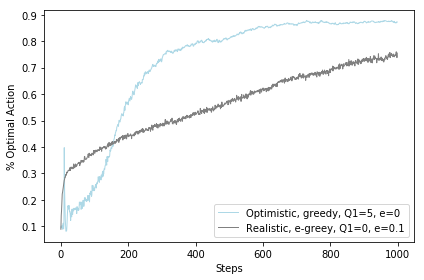

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(opt_opt_gr_A,    linewidth=1., color='lightblue', label='Optimistic, greedy, Q1=5, e=0')
ax.plot(opt_real_ep01_A, linewidth=1., color='gray',      label='Realistic, e-greey, Q1=0, e=0.1')
ax.set_xlabel('Steps'); ax.set_ylabel('% Optimal Action')
ax.legend()
plt.tight_layout()
plt.savefig('assets/fig_0203.png')
plt.show()